# Generación y uso de redes neuronales supervisadas para la predicción de incendios forestales en el parque Montesinho
## Docente: Nelson Enrique Vera
### Estudiante:

### Andrés Mauricio Acosta Pulido 
- Código: 20142020111 - AndresAcostaPulido96@gmail.com

#### Cibernetica 3 2019-1

In [1]:
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from random import randint
from joblib import load
from matplotlib.pyplot import figure

In [2]:
df=pd.read_csv('data/forestfires.csv')
df.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

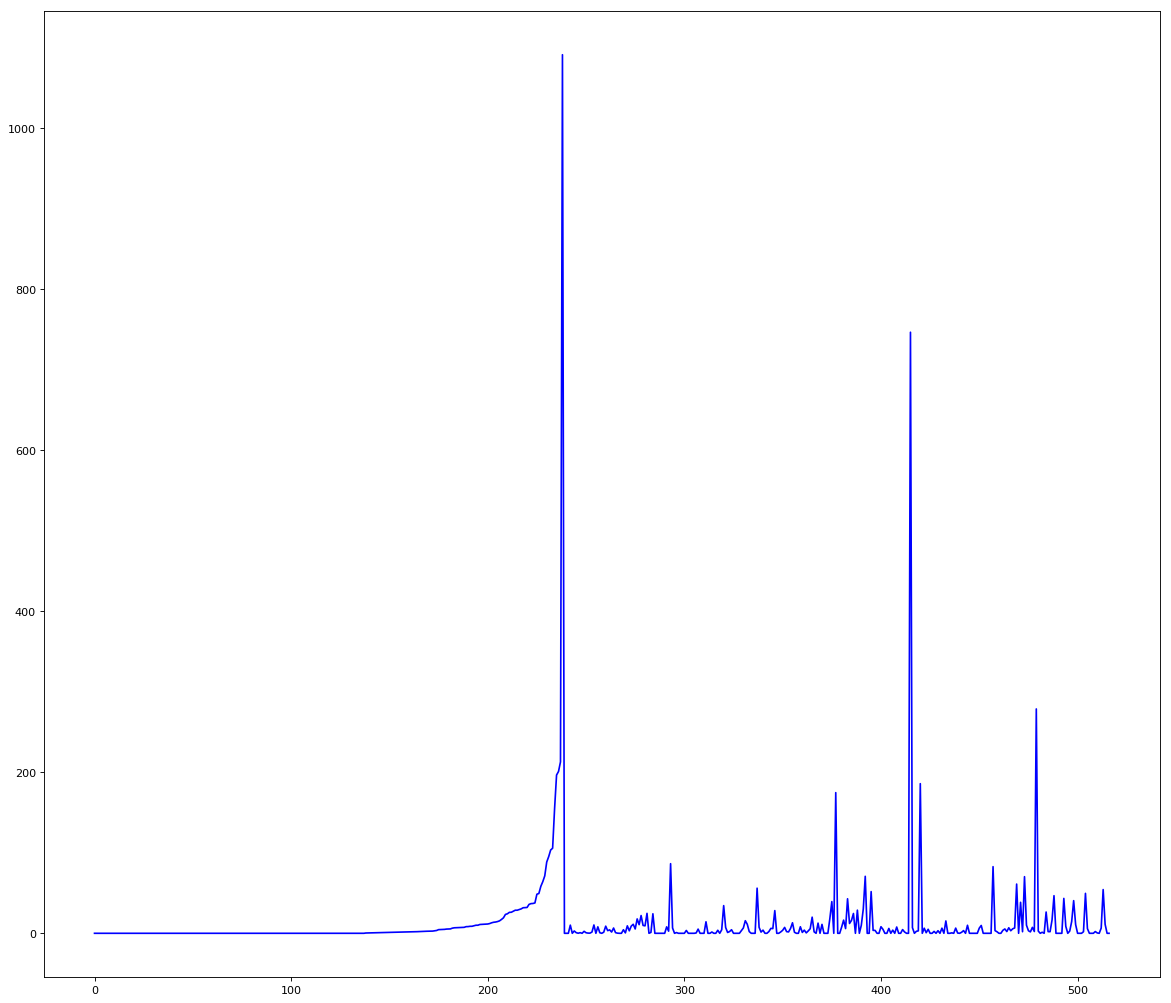

In [3]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df['area'], color='b')

In [4]:
df['X'] = df.apply( lambda row: row['X']/9, axis = 1 )
df['Y'] = df.apply( lambda row: row['Y']/9, axis = 1 )
df['month'] = df.apply( lambda row: row['month'], axis = 1 )
df['day'] = df.apply( lambda row: row['day'], axis = 1 )
df['FFMC'] = df.apply( lambda row: (row['FFMC']-18.7)/77.5, axis = 1 )
df['DMC'] = df.apply( lambda row: (row['DMC']-1.1)/290.2, axis = 1 )
df['DC'] = df.apply( lambda row: (row['DC']-7.9)/852.7, axis = 1 )
df['ISI'] = df.apply( lambda row: (row['ISI'])/56.1, axis = 1 )
df['temp'] = df.apply( lambda row: (row['temp'])/40, axis = 1 )
df['RH'] = df.apply( lambda row: (row['RH'])/100, axis = 1 )
df['wind'] = df.apply( lambda row: (row['wind'])/10, axis = 1 )
df['rain'] = df.apply( lambda row: (row['rain'])/10, axis = 1 )
#df['area'] = df.apply( lambda row: math.log((row['area'])+1,1501), axis = 1 )
df['area'] = df.apply( lambda row: (row['area'])/1500, axis = 1 )
df.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.518805    0.477756    0.928318    0.378264    0.633329    0.160814   
std      0.257086    0.136656    0.071227    0.220698    0.290918    0.081274   
min      0.111111    0.222222    0.000000    0.000000    0.000000    0.000000   
25%      0.333333    0.444444    0.922581    0.232598    0.504046    0.115865   
50%      0.444444    0.444444    0.940645    0.369400    0.769673    0.149733   
75%      0.777778    0.555556    0.957419    0.486906    0.827958    0.192513   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             temp          RH        wind        rain        area  
count  517.000000  517.000000  517.000000  517.000000  517.000000  
mean     0.472229    0.442882    0.401760    0.002166    0.008565  
std      0.145166    0.163175    0.179165    0.029596    0.042437  
min      0.055000    0.150000    0.040000    0.000000    0.000000  
25%      0.387500    0.330000    0.270000    0.000000    0.000000  
50%      0.482500    0.420000    0.400000    0.000000    0.000347  
75%      0.570000    0.530000    0.490000    0.000000    0.004380  
max      0.832500    1.000000    0.940000    0.640000    0.727227

In [5]:
dummiedf = df.loc[:,['month', 'day']]
dummiedf = pd.get_dummies(dummiedf)
df = df.drop(['month', 'day'], axis=1)
df = pd.concat([df, dummiedf], axis=1)

In [6]:
X = df.as_matrix( columns = [
    'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
    'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'])
X

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[0.77777778, 0.55555556, 0.87096774, ..., 0.        , 0.        ,
        0.        ],
       [0.77777778, 0.44444444, 0.92774194, ..., 0.        , 1.        ,
        0.        ],
       [0.77777778, 0.44444444, 0.92774194, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.77777778, 0.44444444, 0.8116129 , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.44444444, 0.97677419, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.33333333, 0.78451613, ..., 0.        , 1.        ,
        0.        ]])

In [7]:
y = df['area']
y.describe()

count    517.000000
mean       0.008565
std        0.042437
min        0.000000
25%        0.000000
50%        0.000347
75%        0.004380
max        0.727227
Name: area, dtype: float64

In [8]:
cor=df.corr()
df.corr()

X         Y      FFMC       DMC        DC       ISI  \
X          1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210   
Y          0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488   
FFMC      -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805   
DMC       -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128   
DC        -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154   
ISI        0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000   
temp      -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287   
RH         0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517   
wind       0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826   
rain       0.065387  0.033234  0.056702  0.074790  0.035861  0.067668   
area       0.063385  0.044873  0.040122  0.072994  0.049383  0.008258   
month_apr  0.063832 -0.008405 -0.117199 -0.197543 -0.268211 -0.106478   
month_aug -0.059669 -0.010404  0.228103  0.497928  0.279361  0.334639   
month_dec -0.006547  0.075850 -0.137044 -0.176301 -0.105642 -0.162322   
month_feb  0.041721  0.016358 -0.281535 -0.317899 -0.399277 -0.249777   
month_jan -0.045002  0.010153 -0.454771 -0.105647 -0.115064 -0.103588   
month_jul  0.061062  0.061449  0.031833 -0.001946 -0.100887  0.020982   
month_jun  0.129616  0.078594 -0.040634 -0.050403 -0.186183  0.111516   
month_mar  0.007827  0.050495 -0.074327 -0.407404 -0.650427 -0.143520   
month_may  0.008917 -0.015206 -0.037230 -0.081980 -0.114209 -0.060493   
month_nov  0.025344 -0.046570 -0.088964 -0.074218 -0.078380 -0.076559   
month_oct  0.089545  0.004717 -0.005998 -0.187632  0.093279 -0.071154   
month_sep -0.087216 -0.105465  0.076609  0.110907  0.531857 -0.068877   
day_fri   -0.020061 -0.048773  0.019306 -0.012010 -0.004220  0.046695   
day_mon    0.039367  0.021640 -0.059396 -0.107921 -0.052993 -0.158601   
day_sat    0.024461  0.003483 -0.019637 -0.003653 -0.035189 -0.038585   
day_sun   -0.029338  0.006172 -0.089517  0.025355 -0.001431 -0.003243   
day_thu    0.000457  0.027873  0.071730  0.087672  0.051859 -0.022406   
day_tue   -0.027521 -0.053475  0.011225  0.000016  0.028368  0.068610   
day_wed    0.016035  0.050495  0.093908  0.017939  0.024803  0.125415   

               temp        RH      wind      rain  ...  month_nov  month_oct  \
X         -0.051258  0.085223  0.018798  0.065387  ...   0.025344   0.089545   
Y         -0.024103  0.062221 -0.020341  0.033234  ...  -0.046570   0.004717   
FFMC       0.431532 -0.300995 -0.028485  0.056702  ...  -0.088964  -0.005998   
DMC        0.469594  0.073795 -0.105342  0.074790  ...  -0.074218  -0.187632   
DC         0.496208 -0.039192 -0.203466  0.035861  ...  -0.078380   0.093279   
ISI        0.394287 -0.132517  0.106826  0.067668  ...  -0.076559  -0.071154   
temp       1.000000 -0.527390 -0.227116  0.069491  ...  -0.053798  -0.053513   
RH        -0.527390  1.000000  0.069410  0.099751  ...  -0.035885  -0.072334   
wind      -0.227116  0.069410  1.000000  0.061119  ...   0.011864  -0.053850   
rain       0.069491  0.099751  0.061119  1.000000  ...  -0.003225  -0.012665   
area       0.097844 -0.075519  0.012317 -0.007366  ...  -0.008893  -0.016878   
month_apr -0.157051  0.021235  0.048266 -0.009752  ...  -0.005860  -0.023008   
month_aug  0.351404  0.054761  0.028577  0.093101  ...  -0.032724  -0.128493   
month_dec -0.329648 -0.047714  0.269702 -0.009752  ...  -0.005860  -0.023008   
month_feb -0.320015  0.140430 -0.029431 -0.014698  ...  -0.008831  -0.034676   
month_jan -0.146520  0.170923 -0.070245 -0.004566  ...  -0.002743  -0.010772   
month_jul  0.142588  0.013185 -0.040645 -0.013390  ...  -0.011308  -0.044402   
month_jun  0.051015  0.009382  0.012124 -0.013510  ...  -0.008117  -0.031874   
month_mar -0.341797 -0.089836  0.181433 -0.020744  ...  -0.015034  -0.059034   
month_may -0.045540  0.086822  0.015054 -0.004566  ...  -0.002743  -0.010772   
month_nov -0.053798 -0.035885  0.011864 -0.003225  ...   1.000000  -0.0076

In [9]:
#mlp = load('MLPRegressorbest__1560842526716__0_012688.joblib')
#mlp = load('MLPRegressorbest__1560840174222__0_015230.joblib')
mlp = load('webservice/algoritmo/resources/MLPRegressorbest__1566899474132___0_010564.joblib')
y_pred = mlp.predict(X)
mlp

/home/andres/.local/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.21.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [10]:
params = mlp.get_params()
params

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (12, 9),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 5000000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [11]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
rmae = np.sqrt(mean_absolute_error(y, y_pred))
r2 = r2_score(y, y_pred)

In [12]:
print(u'Error cuadrático medio: {:.10f}'.format(mse))
print(u'Raiz Error cuadrático medio (RMSE): %.10f' % rmse)
print(u'Error absoluto medio (MAE): {:.10f}'.format(mae))
print(u'Raiz Error absoluto medio: %.2f' % rmae)
print(u'Estadístico R_2: %.10f' % r2)

Error cuadrático medio: 0.0001115902
Raiz Error cuadrático medio (RMSE): 0.0105636280
Error absoluto medio (MAE): 0.0057023068
Raiz Error absoluto medio: 0.08
Estadístico R_2: 0.9379169067


In [18]:
0.0105636280*1500

15.845442

0.0
-16.41168587753433
1090.84
1085.4053178425356


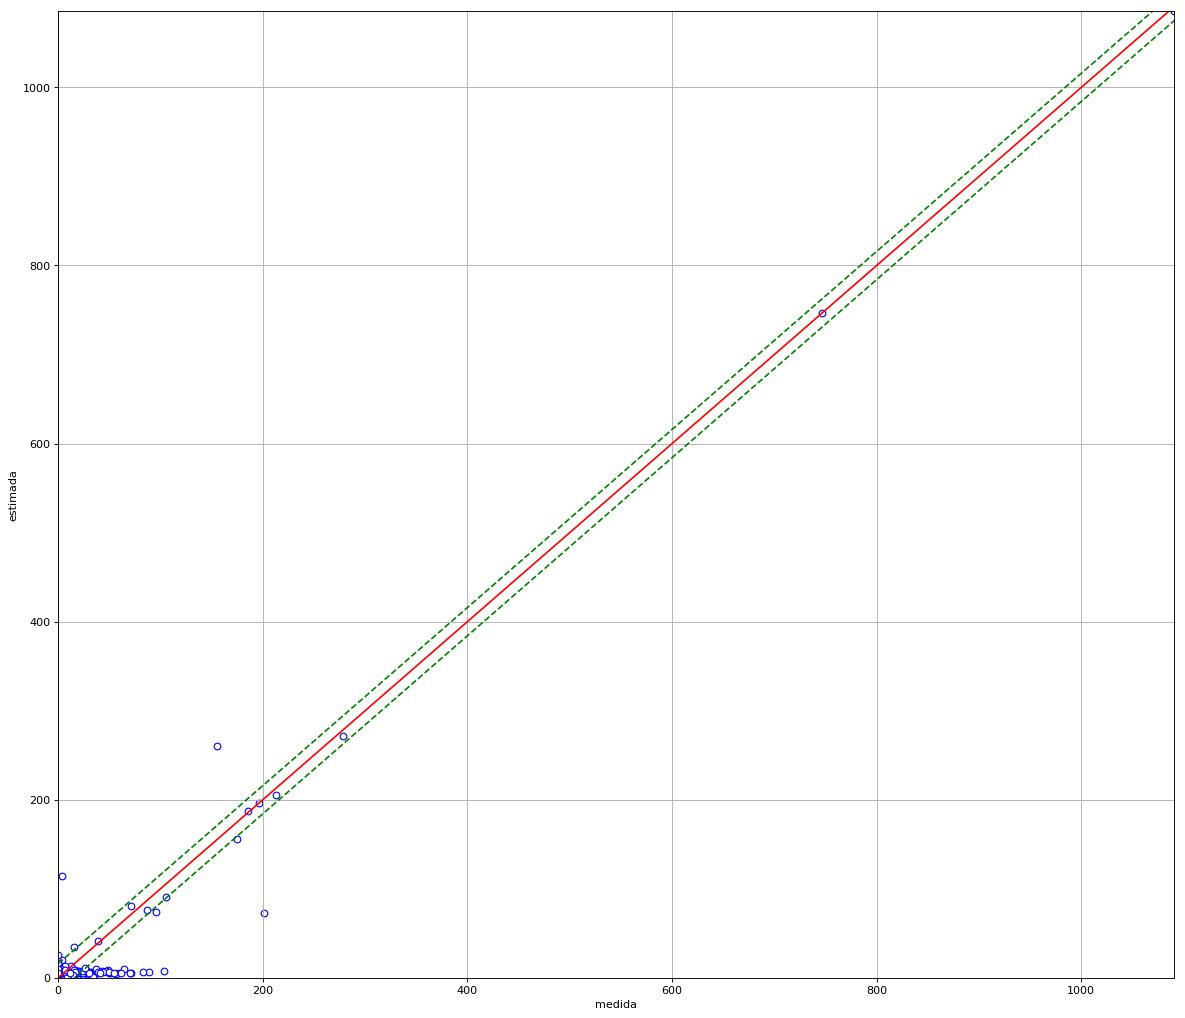

In [22]:

est=np.linspace(0, 1500, 1500)
#unnormalized_y = ((1501**y)-1)
#unnormalized_y_pred = ((1501**y_pred)-1)
unnormalized_y = y*1500
unnormalized_y_pred = y_pred*1500
#unnormalized_y_pred=pd.Series(unnormalized_y_pred)
print(min(unnormalized_y))
print(min(unnormalized_y_pred))
#unnormalized_y = unnormalized_y.apply(lambda x: math.log(abs(x)+1, 1501))
#unnormalized_y_pred = unnormalized_y_pred.apply(lambda x: math.log(abs(x)+1, 1501))
#unnormalized_y=np.log(unnormalized_y+1, order='1501')
#unnormalized_y_pred=np.log(unnormalized_y_pred+1, t='1501')
print(max(unnormalized_y))
print(max(unnormalized_y_pred))
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(unnormalized_y, unnormalized_y_pred, marker='o',c='w', edgecolor='b')
plt.plot(est, est, c='r')
plt.plot(est, est+15.845442, c='g', linestyle='--')
plt.plot(est, est-15.845442, c='g', linestyle='--')
plt.grid(True)
plt.xlim(0, max(unnormalized_y))
plt.ylim(0, max(unnormalized_y_pred))
plt.xlabel('medida')
plt.ylabel('estimada')
plt.show()

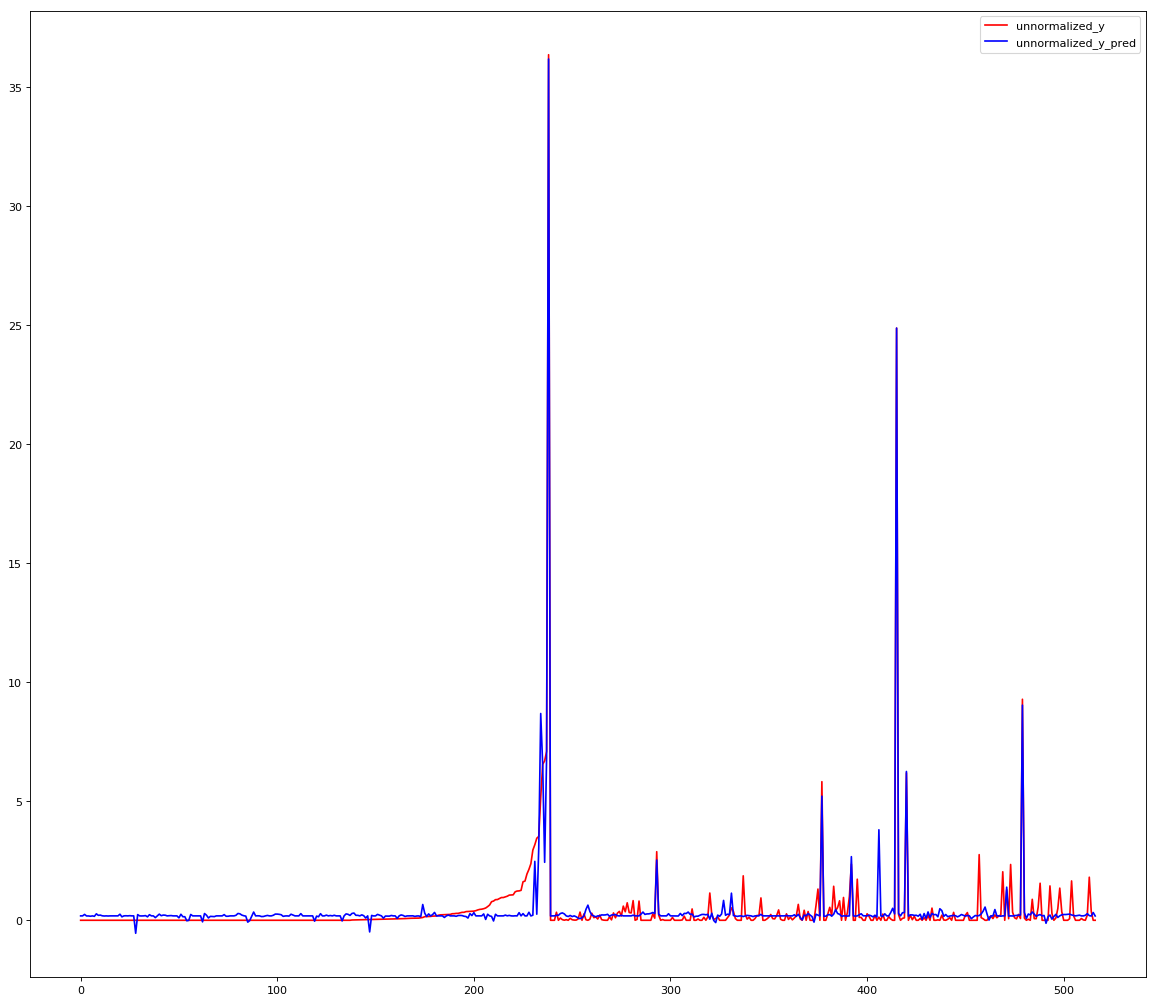

In [14]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(unnormalized_y, color='r', label='unnormalized_y')
plt.plot(unnormalized_y_pred, color='b', label='unnormalized_y_pred')
plt.legend()
plt.show()